# STAT3009 Project 1

Leung Yuk Hei Boris 1155158560


## Exploratory Data Analysis

This part of the code aims at conducting a broad overview on the given datasets.

### Printing the Datasets

We will first prints out the first 5 rows of both of the datasets to get a feel of how the data looks. Besides, we will also look at how pandas infer the type of each column.


In [2]:
# Basic Data Descriptions
import pandas as pd

import os

DATA_DIR = "data"
train_data = pd.read_csv(os.path.join(DATA_DIR, "train.csv"))
X = pd.read_csv(os.path.join(DATA_DIR, "test.csv"))

print("Training data:")
print(train_data.head())
print(train_data.dtypes)
print()
print("Test data:")
print(X.head())
print(X.dtypes)

Training data:
   user_id  item_id  rating
0      482       18       7
1       65      557       3
2       26      106       0
3      215      534       5
4      403      355       0
user_id    int64
item_id    int64
rating     int64
dtype: object

Test data:
   user_id  item_id
0      571       48
1      362      164
2      180      488
3       88      541
4      238      233
user_id    int64
item_id    int64
dtype: object


It appears that all of the values in the two datasets are of the same `int` type, which makes it very easy to work with.

One interesting thing to note here is that the `rating` column here seems to have a value greater than 5, which is different from those we have been dealing with in lessons or homeworks. We will have a further look at the data by calling `describe()`. Any missing rows with missing values will also be found here.


In [3]:
# More in-depth information
print("Training data description:")
print(train_data.describe())
print(f"Rows with missing values: {train_data.shape[0] - train_data.dropna().shape[0]}")
print()

print("Test data description:")
print(X.describe())
print(f"Rows with missing values: {X.shape[0] - X.dropna().shape[0]}")

Training data description:
            user_id       item_id        rating
count  16214.000000  16214.000000  16214.000000
mean     289.330702    393.746084      3.008203
std      173.237797    234.198749      2.494080
min        0.000000      0.000000      0.000000
25%      144.000000    185.000000      1.000000
50%      287.000000    392.000000      3.000000
75%      429.000000    597.000000      5.000000
max      599.000000    798.000000     10.000000
Rows with missing values: 0

Test data description:
           user_id      item_id
count  6949.000000  6949.000000
mean    292.614189   397.252410
std     173.958515   231.824015
min       0.000000     0.000000
25%     142.000000   189.000000
50%     294.000000   402.000000
75%     434.000000   597.000000
max     599.000000   798.000000
Rows with missing values: 0


### Histogram Plots

From the previous section, we can see the range of possible values for the data, with:

-   user_id: from 0 to 599
-   item_id: from 0 to 798
-   rating: from 0 to 10

But alone from these values, we can't really see the distribution of the data. To confirm whether the data might be biased/skewed or not, we are going to take a look at some histograms.


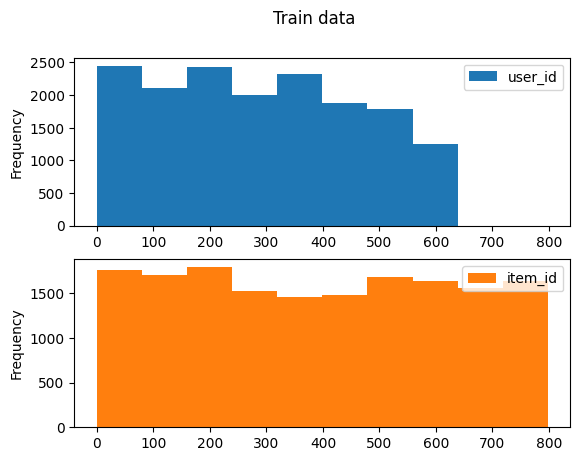

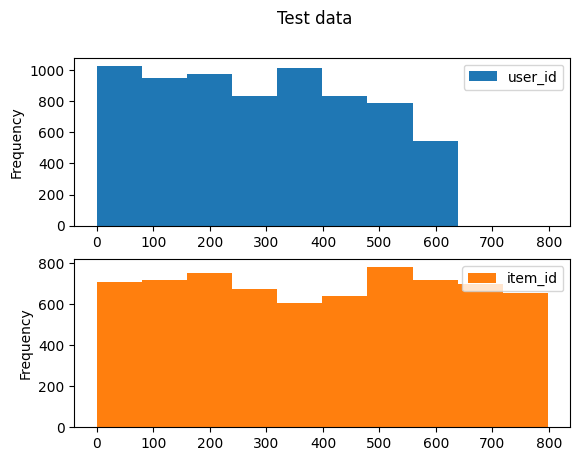

array([<Axes: xlabel='Train data rating', ylabel='Frequency'>],
      dtype=object)

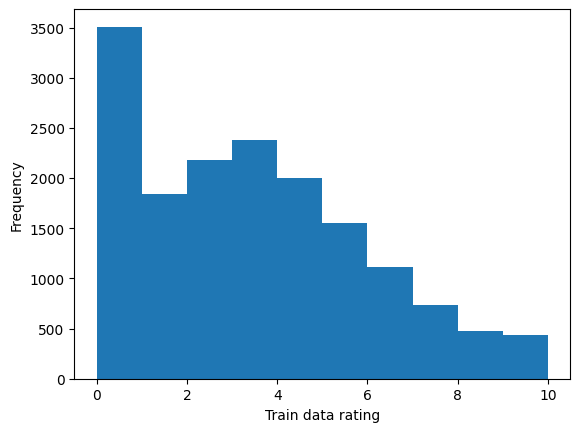

In [3]:
import matplotlib.pyplot as plt

FIGURE_SIZE = 4
# separating user_id and item_id from ratings since there scales are different
train_data[["user_id", "item_id"]].plot(
    kind="hist", subplots=True, sharex=False, sharey=False, title="Train data"
)
X.plot(
    kind="hist",
    subplots=True,
    sharex=False,
    sharey=False,
    title="Test data",
)
plt.show()
train_data["rating"].plot(
    kind="hist",
    subplots=True,
    xlabel="Train data rating",
)

From the histograms above, we can see that the distributions of both 'user_id' and 'item_id' are somewhat uniform, with the only exception of 'user_id''s frequency falling off by the end as it approaches 599. We might do something to accommodate for that in a later stage.

Another interesting to note is that the 'rating' distribution is not uniform or normal at all, instead it is as if it were a normal distribution centered at around 3 with a much heavy tail around 0. We might want to further investigate this...


<Axes: xlabel='item_id', ylabel='rating'>

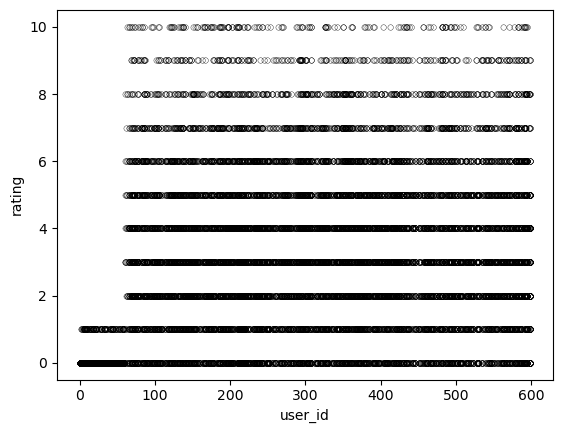

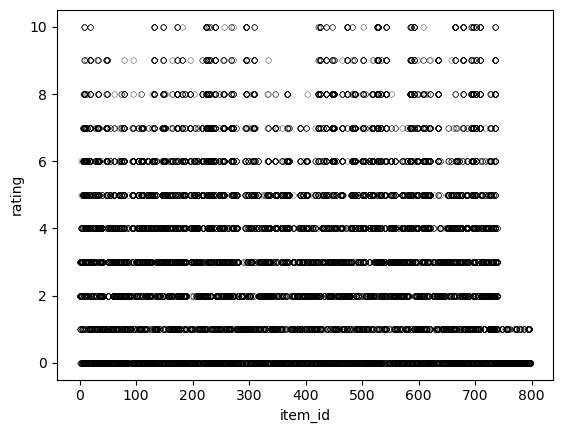

In [47]:
# Scatter plots
train_data[["user_id", "rating"]].plot(
    kind="scatter",
    x="user_id",
    y="rating",
    marker="$\u25EF$",
    color="black",
    s=20,
    linewidth=0,
)
train_data[["item_id", "rating"]].plot(
    kind="scatter",
    x="item_id",
    y="rating",
    marker="$\u25EF$",
    color="black",
    s=20,
    linewidth=0,
)

Two fascinating things here:

-   The lower the rating, the denser the points are (especially significant between 'item_id' and 'rating'), suggesting a bias towards lower ratings overall.
-   There seems to be a "border" between ratings > 1, and either 'user_id' < around 80 or 'item_id' > 750, suggested by a clear empty rectangular areas in both plots. It appears to be manually configured to behave so.


### Number of Users and Items and Respective Top Frequencies

Below we are going to find out how many unique user and item there are, and whether are there any users which are extremely active in rating or is there a popular item to rate among the dataset.


unique_user=593, unique_item=785

9      152
99     131
177    129
6      127
53     126
      ... 
531      1
303      1
525      1
539      1
524      1
Length: 593, dtype: int64
786    105
624    101
355     93
597     83
522     82
      ... 
724      1
77       1
364      1
751      1
86       1
Length: 785, dtype: int64
           rating
item_id          
798      0.000000
669      0.000000
650      0.000000
190      0.000000
191      0.000000
...           ...
425      7.186047
664      7.218750
592      7.428571
708      7.520000
679      7.729730

[782 rows x 1 columns]


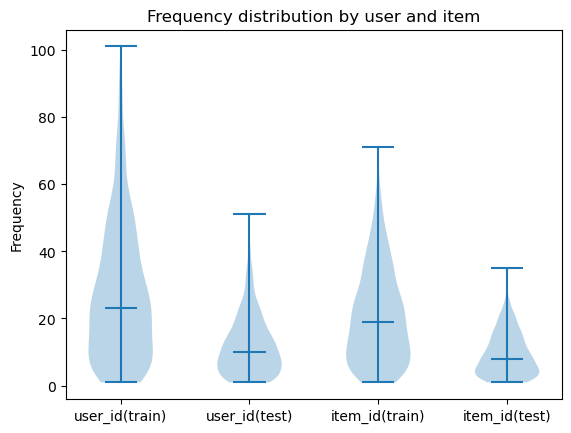

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# get number of unique users
unique_user, unique_item = [
    np.unique(np.union1d(train_data[column], X[column])).size
    for column in ("user_id", "item_id")
]
print(f"{unique_user=}, {unique_item=}")
print()

# get row counts by user and item
train_user_counts = train_data["user_id"].value_counts(sort=True, ascending=False)
train_item_counts = train_data["item_id"].value_counts(sort=True, ascending=False)
test_user_counts = X["user_id"].value_counts(sort=True, ascending=False)
test_item_counts = X["item_id"].value_counts(sort=True, ascending=False)

all_user = np.append(train_data["user_id"].values, X["user_id"])
all_item = np.append(train_data["item_id"].values, X["item_id"])
print(pd.Series(all_user).value_counts(sort=True, ascending=False))
print(pd.Series(all_item).value_counts(sort=True, ascending=False))
print(
    train_data[["rating", "item_id"]]
    .groupby(by="item_id")
    .mean()
    .sort_values(by="rating")
)

# HEAD = 10
# print(f"{HEAD} most frequent users/items")
# count_df = pd.DataFrame(
#     {
#         "user_id(train)": train_user_counts.head(HEAD).index,
#         "user_id counts(train)": train_user_counts.head(HEAD).values,
#         "item_id(train)": train_item_counts.head(HEAD).index,
#         "item_id counts(train)": train_item_counts.head(HEAD).values,
#         "user_id(test)": test_user_counts.head(HEAD).index,
#         "user_id counts(test)": test_user_counts.head(HEAD).values,
#         "item_id(test)": test_item_counts.head(HEAD).index,
#         "item_id counts(test)": test_item_counts.head(HEAD).values,
#     }
# )
# print(count_df)

df = pd.DataFrame(
    {
        "user_id(train)": train_user_counts,
        "user_id(test)": test_user_counts,
        "item_id(train)": train_item_counts,
        "item_id(test)": test_item_counts,
    }
)
plt.violinplot(
    [train_user_counts, test_user_counts, train_item_counts, test_item_counts],
    showmedians=True,
)
plt.title("Frequency distribution by user and item")
plt.xticks(
    np.arange(1, 5),
    ["user_id(train)", "user_id(test)", "item_id(train)", "item_id(test)"],
)
plt.ylabel("Frequency")
plt.show()

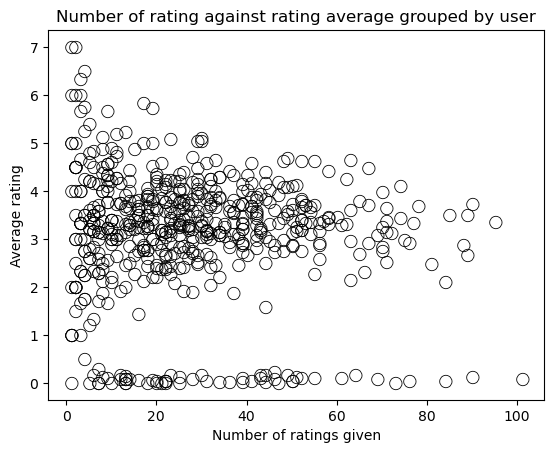

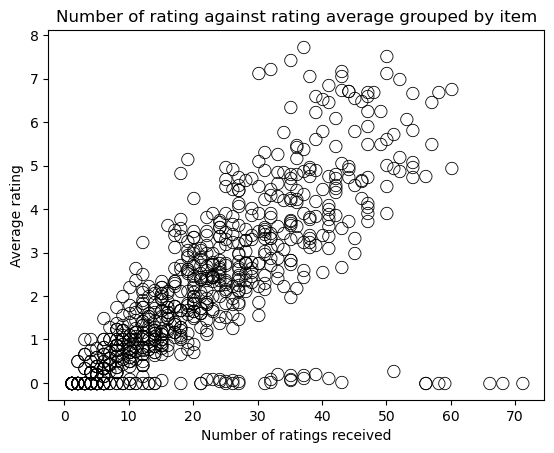

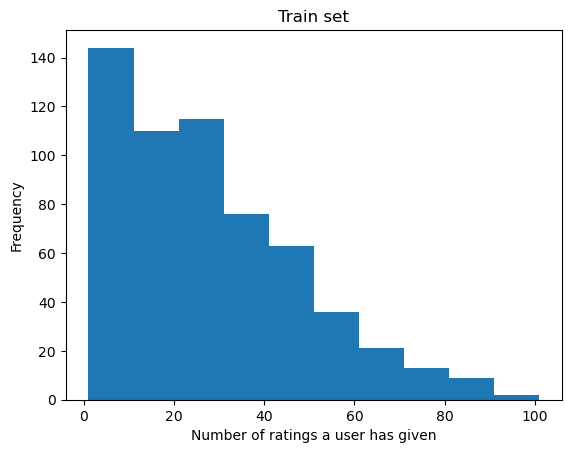

Text(0.5, 0, 'Number of ratings a user has given')

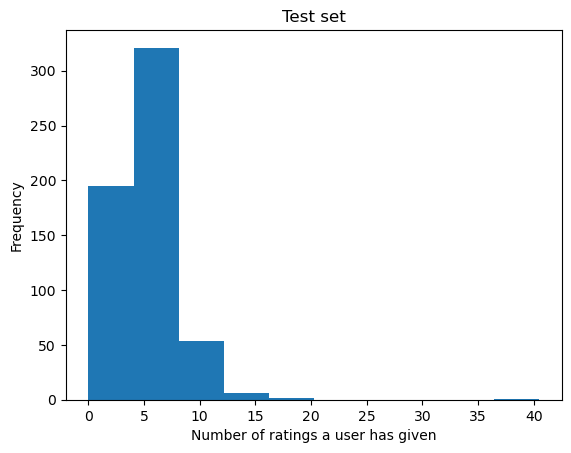

In [42]:
ax = (
    train_data[["user_id", "rating"]]
    .groupby("user_id")
    .aggregate(["mean", "count"])
    .plot(
        kind="scatter",
        x=("rating", "count"),
        y=("rating", "mean"),
        title="Number of rating against rating average grouped by user",
        marker="$\u25EF$",
        color="black",
        s=100,
        linewidth=0,
    )
)
ax.set_xlabel("Number of ratings given")
ax.set_ylabel("Average rating")
ax2 = (
    train_data[["item_id", "rating"]]
    .groupby("item_id")
    .aggregate(["mean", "count"])
    .plot(
        kind="scatter",
        x=("rating", "count"),
        y=("rating", "mean"),
        title="Number of rating against rating average grouped by item",
        marker="$\u25EF$",
        color="black",
        s=100,
        linewidth=0,
    )
)
ax2.set_xlabel("Number of ratings received")
ax2.set_ylabel("Average rating")
plt.show()
ax3 = train_data["user_id"].value_counts().plot(kind="hist")
ax3.set_title("Train set")
ax3.set_xlabel("Number of ratings a user has given")
plt.show()
ax4 = (
    train_data[["user_id", "rating"]]
    .groupby("user_id")["rating"]
    .var()
    .plot(kind="hist")
)
ax4.set_title("Test set")
ax4.set_xlabel("Number of ratings a user has given")

### Conclusion

There are a few things to note about the dataset:

1. The ratings range from 0 to 10.
2. There are no missing values.
3. 'user_id' and 'item_id' are somewhat equally distributed.
4. Ratings are not equally distributed, instead they are biased, particularly favouring lower ratings.
5. Manually engineered bounds on the ratings might exist.


## Model Development

### Data Preparation

We are going to divide and rename the data into X and y so as to make the variables easier to use. In addition, we are going to make use of `cross_validation` from `sklearn` so there is no need to manually split the data. The function itself will automatically do the work for us.


In [2]:
train_X, train_y = (
    train_data[["user_id", "item_id"]].values,
    train_data["rating"].values,
)
test_X = X.values

### Benchmark Models

To server as benchmarks, we are going to use the models demonstrated in the lecture. This includes the following models:

-   Global Average Model,
-   User Average Model,
-   Item Average Model,
-   User Average + Item Residual Model,
-   Item Average + User Residual Model, and
-   Matrix Factorization Model

These models serve as a baseline for the further models to be evaluated against so as to get a feel of how good our new models would do. It is believed that we are already very familiar with these models that no introductions and descriptions for them are required here.

_Note: To save space and time, the following chunk of code block will encompass all of the above models, with some copied and pasted from my own homework or from the lecture. A few changes will be applied to interface with `sklearn`._


In [3]:
import numpy as np
from sklearn.base import BaseEstimator

from typing import Sequence


class GlobalAverage(BaseEstimator):
    def __init__(self) -> None:
        pass

    def fit(self, X: Sequence, y: Sequence, **fit_params):
        self.avg = np.mean(y)
        return self

    def predict(self, X: Sequence) -> Sequence[float]:
        return [self.avg] * len(X)


class UserMean(BaseEstimator):
    def __init__(self) -> None:
        self.users = {}
        self.global_mean = 0

    def fit(self, X: np.array, y: np.array, **fit_params):
        for (user_id, item_id), rating in zip(X, y):
            self.users[user_id] = np.append(
                self.users.get(user_id, np.array([])), rating
            )

        self.global_mean = np.mean(y)
        return self

    def predict(self, X: np.array) -> np.array:
        result = np.array([])
        for user_id, item_id in X:
            result = np.append(
                result, self.users.get(user_id, np.array([self.global_mean])).mean()
            )
        return result


class ItemMean(BaseEstimator):
    def __init__(self) -> None:
        self.items = {}
        self.global_mean = 0

    def fit(self, X: np.array, y: np.array, **fit_params):
        for (user_id, item_id), rating in zip(X, y):
            self.items[item_id] = np.append(
                self.items.get(item_id, np.array([self.global_mean])), rating
            )

        self.global_mean = np.mean(y)
        return self

    def predict(self, X: np.array) -> np.array:
        result = np.array([])
        for user_id, item_id in X:
            result = np.append(
                result, self.items.get(item_id, np.array([self.global_mean])).mean()
            )
        return result


class UserMeanItemResidual(BaseEstimator):
    def __init__(self) -> None:
        self.user_mean = UserMean()
        self.item_mean = ItemMean()

    def fit(self, X: np.array, y: np.array, **fit_params):
        self.user_mean.fit(X.copy(), y.copy())
        self.ratings_residuals = y.copy() - self.user_mean.predict(X.copy())
        self.item_mean.fit(X.copy(), self.ratings_residuals)
        return self

    def predict(self, X: np.array) -> np.array:
        user_mean_prediction = self.user_mean.predict(X.copy())
        item_mean_prediction = self.item_mean.predict(X.copy())
        return user_mean_prediction + item_mean_prediction


class ItemMeanUserResidual(BaseEstimator):
    def __init__(self) -> None:
        self.user_mean = UserMean()
        self.item_mean = ItemMean()

    def fit(self, X: np.array, y: np.array, **fit_params):
        self.item_mean.fit(X.copy(), y.copy())
        self.ratings_residuals = y.copy() - self.item_mean.predict(X.copy())
        self.user_mean.fit(X.copy(), self.ratings_residuals)
        return self

    def predict(self, X: np.array) -> np.array:
        user_mean_prediction = self.user_mean.predict(X.copy())
        item_mean_prediction = self.item_mean.predict(X.copy())
        return user_mean_prediction + item_mean_prediction


class MatrixFactorization(BaseEstimator):
    def __init__(
        self, n_user, n_item, lam=0.001, K=10, iterNum=50, tol=1e-4, verbose=1
    ):
        self.P = np.random.randn(n_user, K)
        self.Q = np.random.randn(n_item, K)
        # self.index_item = []
        # self.index_user = []
        self.n_user = n_user
        self.n_item = n_item
        self.lam = lam
        self.K = K
        self.iterNum = iterNum
        self.tol = tol
        self.verbose = verbose

    def fit(self, X, y, **fit_params):
        diff, tol = 1.0, self.tol
        n_user, n_item, n_obs = self.n_user, self.n_item, len(X)
        K, iterNum, lam = self.K, self.iterNum, self.lam
        ## store user/item index set
        self.index_item = [np.where(X[:, 1] == i)[0] for i in range(n_item)]
        self.index_user = [np.where(X[:, 0] == u)[0] for u in range(n_user)]

        if self.verbose:
            print("Fitting Reg-MF: K: %d, lam: %.5f" % (K, lam))

        for i in range(iterNum):
            ## item update
            obj_old = self.obj(test_pair=X, test_rating=y)
            for item_id in range(n_item):
                index_item_tmp = self.index_item[item_id]
                if len(index_item_tmp) == 0:
                    self.Q[item_id, :] = 0.0
                    continue
                ## compute `sum_pu` and `sum_matrix`
                sum_pu, sum_matrix = np.zeros((K)), np.zeros((K, K))
                for record_ind in index_item_tmp:
                    ## double-check
                    if item_id != X[record_ind][1]:
                        raise ValueError("the item_id is worning in updating Q!")
                    user_id, rating_tmp = (
                        X[record_ind][0],
                        y[record_ind],
                    )
                    sum_matrix = sum_matrix + np.outer(
                        self.P[user_id, :], self.P[user_id, :]
                    )
                    sum_pu = sum_pu + rating_tmp * self.P[user_id, :]
                self.Q[item_id, :] = np.dot(
                    np.linalg.inv(sum_matrix + lam * n_obs * np.identity(K)), sum_pu
                )

            for user_id in range(n_user):
                index_user_tmp = self.index_user[user_id]
                if len(index_user_tmp) == 0:
                    self.P[user_id, :] = 0.0
                    continue
                ## compute `sum_qi` and `sum_matrix`
                sum_qi, sum_matrix = np.zeros((K)), np.zeros((K, K))
                for record_ind in index_user_tmp:
                    ## double-check
                    if user_id != X[record_ind][0]:
                        raise ValueError("the user_id is worning in updating P!")
                    item_id, rating_tmp = (
                        X[record_ind][1],
                        y[record_ind],
                    )
                    sum_matrix = sum_matrix + np.outer(
                        self.Q[item_id, :], self.Q[item_id, :]
                    )
                    sum_qi = sum_qi + rating_tmp * self.Q[item_id, :]
                self.P[user_id, :] = np.dot(
                    np.linalg.inv(sum_matrix + lam * n_obs * np.identity(K)), sum_qi
                )
            # compute the new rmse score
            obj_new = self.obj(test_pair=X, test_rating=y)
            diff = abs(obj_new - obj_old) / obj_old
            if self.verbose:
                print("Reg-MF: ite: %d; diff: %.3f Obj: %.3f" % (i, diff, obj_new))
            if diff < tol:
                break

    def predict(self, X):
        # predict ratings for user-item pairs
        pred_rating = [np.dot(self.P[line[0]], self.Q[line[1]]) for line in X]
        return np.array(pred_rating)

    def rmse(self, test_pair, test_rating):
        # report the rmse for the fitted `MF`
        pred_rating = self.predict(X=test_pair)
        return np.sqrt(np.mean((pred_rating - test_rating) ** 2))

    def obj(self, test_pair, test_rating):
        return (
            (self.rmse(test_pair, test_rating)) ** 2
            + self.lam * np.sum(self.P**2)
            + self.lam * np.sum(self.Q**2)
        )

### Model Evaluation

According to the instructions, the model predictions will be evaluated based on RMSE. The following block will consist of the RMSE function. We will also wrap around this function in order to make a `sklearn` compatible scoring metrics.

Then, all the benchmarks models from the previous section will be tested on the metric with 5-fold cross-validation.


In [115]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate
from tqdm import tqdm


# evaluation metric
def rmse(true_rating, pred_rating):
    return np.sqrt(np.mean((true_rating - pred_rating) ** 2))


# sklearn compatible scoring
score = make_scorer(rmse, greater_is_better=False)

FOLD = 5


def evaluate_models(
    models: Sequence[BaseEstimator], fold=FOLD, verbose=True, **kwargs
) -> pd.DataFrame:
    baseline_performance = pd.DataFrame(
        {
            "Model": [],
            "Average Test RMSE": [],
        }
    ).set_index("Model")
    for model in models if not verbose else (progress_bar := tqdm(models)):
        model_name = model.__class__.__name__
        if verbose:
            progress_bar.set_description(f"Fitting {model_name}")
        mean_score = -np.nanmean(
            cross_validate(
                model, cv=fold, X=train_X, y=train_y, scoring=score, **kwargs
            )["test_score"]
        )
        baseline_performance.loc[model_name] = mean_score
    return baseline_performance.sort_values(by="Average Test RMSE")

In [110]:
n_user = max(np.max(train_X[:, 0]), np.max(test_X[:, 0])) + 1
n_item = max(np.max(train_X[:, 1]), np.max(test_X[:, 1])) + 1

baseline_models = [
    GlobalAverage(),
    UserMean(),
    ItemMean(),
    UserMeanItemResidual(),
    ItemMeanUserResidual(),
    MatrixFactorization(
        n_user=n_user,
        n_item=n_item,
        verbose=0,
    ),
]

evaluate_models(baseline_models, verbose=True, n_jobs=-1)

Fitting GlobalAverage:   0%|          | 0/6 [00:00<?, ?it/s]7222.34s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
7222.34s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
7222.34s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
7222.35s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
7222.36s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
7222.37s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
7222.37s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
7222.39s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
7222.40s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
7222.40s - pydevd: Sending message related to process being replaced timed-out after 

,Average Test RMSE
Model,
MatrixFactorization,0.994387
ItemMeanUserResidual,1.056764
UserMeanItemResidual,1.147565
ItemMean,1.611223
UserMean,2.256926
GlobalAverage,2.494066


### Advanced Models


In [118]:
from sklearn.linear_model import Lasso

import math


class LassoMatrixFactorization(BaseEstimator):
    def __init__(
        self,
        n_user: int,
        n_item: int,
        lambda_: float,
        k: int,
        max_iteration=50,
        tolerance: float | None = None,
        lasso_max_iter: int = 1000,
        lasso_tol: float = 1e-4,
        verbose: int = 0,
    ) -> None:
        self.n_user = n_user
        self.n_item = n_item
        self.P = np.random.randn(n_user, k)
        self.Q = np.random.randn(n_item, k)
        self.lambda_ = lambda_
        self.k = k
        self.max_iteration = max_iteration
        self.tolerance = tolerance
        self.lasso_max_iter = lasso_max_iter
        self.lasso_tol = lasso_tol
        self.verbose = verbose

    def fit(self, data: np.array, target: np.array):
        user_records = {
            user: np.where(data[:, 0] == user)[0] for user in range(self.n_user)
        }
        item_records = {
            item: np.where(data[:, 1] == item)[0] for item in range(self.n_item)
        }
        previous_objective = math.inf
        for iteration in range(self.max_iteration):
            # item update
            for item in range(self.n_item):
                item_record_id = item_records[item]
                if len(item_record_id):
                    lasso = Lasso(
                        self.lambda_,
                        fit_intercept=False,
                        max_iter=self.lasso_max_iter,
                        tol=self.lasso_tol,
                    )
                    lasso.fit(
                        self.P[data[item_record_id][:, 0]], target[item_record_id]
                    )
                    self.Q[item, :] = np.array(lasso.coef_)

            # user update
            for user in range(self.n_user):
                user_record_id = user_records[user]
                if len(user_record_id):
                    lasso = Lasso(
                        self.lambda_,
                        fit_intercept=False,
                        max_iter=self.lasso_max_iter,
                        tol=self.lasso_tol,
                    )
                    lasso.fit(
                        self.Q[data[user_record_id][:, 1]], target[user_record_id]
                    )
                    self.P[user, :] = np.array(lasso.coef_)

            current_objective = self.objective(data, target)
            objective_difference = (
                (abs(previous_objective - current_objective) / previous_objective)
                if previous_objective != math.inf
                else 1.0
            )
            if self.verbose != 0:
                print(
                    f"Iteration {iteration+1:>4d}| Objective function: {current_objective:>10.7f} | Difference: {objective_difference:>6.5f}"
                )

            if self.tolerance is not None and self.tolerance > objective_difference:
                print(
                    f"Objective difference({objective_difference:>6.5f}) smaller than tolerance({self.tolerance:>6.5f}). Terminating training..."
                )
                break
            previous_objective = current_objective
        return self

    def predict(self, X):
        return np.array([np.dot(self.P[row[0]], self.Q[row[1]]) for row in X])

    def objective(self, data, target):
        return rmse(self.predict(data), target) ** 2 + self.lambda_ * (
            np.sum(np.abs(self.P)) + np.sum(np.abs(self.Q))
        )


class AveragesMatrixFactorization(BaseEstimator):
    def __init__(
        self,
        n_user: int,
        n_item: int,
        lambda_: float,
        k: int,
        max_iteration=50,
        tolerance: float | None = None,
        verbose: int = 0,
    ) -> None:
        self.n_user = n_user
        self.n_item = n_item
        self.user_average = list(np.random.randn(n_user))
        self.item_average = list(np.random.randn(n_item))
        self.P = np.random.randn(n_user, k)
        self.Q = np.random.randn(n_item, k)
        self.lambda_ = lambda_
        self.k = k
        self.max_iteration = max_iteration
        self.tolerance = tolerance
        self.verbose = verbose

    def fit(self, X: np.array, y: np.array):
        user_records = {
            user: np.where(X[:, 0] == user)[0] for user in range(self.n_user)
        }
        item_records = {
            item: np.where(X[:, 1] == item)[0] for item in range(self.n_item)
        }
        n_obs = len(X)
        previous_objective = math.inf
        for iteration in range(self.max_iteration):
            # user_average update
            # for user in (progress_bar := tqdm(range(self.n_user))):
            #     progress_bar.set_description(f"Finding user mean")
            for user in range(self.n_user):
                user_record_id = user_records[user]
                if len(user_record_id):
                    residuals = np.zeros_like(user_record_id)
                    for residual_index, (item, rating) in enumerate(
                        zip(X[user_record_id][:, 1], y[user_record_id])
                    ):
                        residuals[residual_index] = (
                            rating
                            - self.item_average[item]
                            - np.dot(self.P[user], self.Q[item])
                        )
                    self.user_average[user] = np.mean(residuals)

            # item_average update
            # for item in (progress_bar := tqdm(range(self.n_item))):
            #     progress_bar.set_description(f"Finding item mean")
            for item in range(self.n_item):
                item_record_id = item_records[item]
                if len(item_record_id):
                    residuals = np.zeros_like(item_record_id)
                    for residual_index, (user, rating) in enumerate(
                        zip(X[item_record_id][:, 0], y[item_record_id])
                    ):
                        residuals[residual_index] = (
                            rating
                            - self.user_average[user]
                            - np.dot(self.P[user], self.Q[item])
                        )
                    self.item_average[item] = np.mean(residuals)

            # user update
            # for user in (progress_bar := tqdm(range(self.n_user))):
            #     progress_bar.set_description(f"Finding P_u")
            for user in range(self.n_user):
                user_record_id = user_records[user]
                if len(user_record_id) == 0:
                    self.P[user_record_id, :] = 0.0
                    continue

                sum_qi, sum_matrix = np.zeros((self.k)), np.zeros((self.k, self.k))
                for record_id in user_record_id:
                    item, rating_tmp = X[record_id, 1], y[record_id]
                    sum_matrix = sum_matrix + np.outer(self.Q[item, :], self.Q[item, :])
                    sum_qi += (
                        rating_tmp - self.user_average[user] - self.item_average[item]
                    ) * self.Q[item, :]
                self.P[user, :] = (
                    np.linalg.inv(
                        sum_matrix + self.lambda_ * n_obs * np.identity(self.k)
                    )
                    @ sum_qi
                )

            # item update
            # for item in (progress_bar := tqdm(range(self.n_item))):
            #     progress_bar.set_description(f"Finding Q_i")
            for item in range(self.n_item):
                item_record_id = item_records[item]
                if len(item_record_id) == 0:
                    self.P[item_record_id, :] = 0.0
                    continue

                sum_qi, sum_matrix = np.zeros((self.k)), np.zeros((self.k, self.k))
                for record_id in item_record_id:
                    user, rating_tmp = X[record_id, 0], y[record_id]
                    sum_matrix = sum_matrix + np.outer(self.Q[user, :], self.Q[user, :])
                    sum_qi += (
                        rating_tmp - self.user_average[user] - self.item_average[item]
                    ) * self.P[user, :]
                self.P[user, :] = (
                    np.linalg.inv(
                        sum_matrix + self.lambda_ * n_obs * np.identity(self.k)
                    )
                    @ sum_qi
                )

            current_objective = self.objective(X, y)
            objective_difference = (
                (abs(previous_objective - current_objective) / previous_objective)
                if previous_objective != math.inf
                else 1.0
            )
            if self.verbose != 0:
                print(
                    f"Iteration {iteration+1:>4d}| Objective function: {current_objective:>10.7f} | Difference: {objective_difference:>6.5f}"
                )

            if self.tolerance is not None and self.tolerance > objective_difference:
                print(
                    f"Objective difference({objective_difference:>6.5f}) smaller than tolerance({self.tolerance:>6.5f}). Terminating training..."
                )
                break
            previous_objective = current_objective

        return self

    def predict(self, X):
        results = [
            self.user_average[user]
            + self.item_average[item]
            + np.dot(self.P[user], self.Q[item])
            for user, item in X
        ]
        return np.array(results)

    def objective(self, data, target):
        return rmse(self.predict(data), target) ** 2 + self.lambda_ * (
            np.sum(self.P**2) + np.sum(self.Q**2)
        )

In [119]:
advanced_models = [
    AveragesMatrixFactorization(
        n_user=n_user, n_item=n_item, lambda_=0.001, k=50, max_iteration=200
    ),
    # LassoMatrixFactorization(n_user, n_item, lambda_=0.001, k=50),
]

evaluate_models(advanced_models, n_jobs=-1, error_score="raise")

Fitting AveragesMatrixFactorization:   0%|          | 0/1 [00:00<?, ?it/s]8412.47s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
8412.47s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
8412.48s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
8412.48s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
8412.49s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
8412.51s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
8412.52s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
8412.53s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
8412.55s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
8412.56s - pydevd: Sending message related to process being replaced ti

,Average Test RMSE
Model,
AveragesMatrixFactorization,1.406297


### SVDs


In [122]:
class NSVD(BaseEstimator):
    def __init__(
        self,
        n_user,
        n_item,
        lam=0.001,
        K=10,
        iterNum=50,
        tol=1e-4,
        verbose=1,
        rd_ratio=0.5,
    ):
        # self.P = np.random.randn(n_user, K)
        self.Q = np.random.randn(n_item, K)
        self.W = np.random.randn(n_item, K)
        # self.index_item = []
        # self.index_user = []
        self.n_user = n_user
        self.n_item = n_item
        self.lam = lam
        self.K = K
        self.iterNum = iterNum
        self.tol = tol
        self.verbose = verbose
        self.fake_P = np.random.randn(n_user, K)
        self.rd_ratio = rd_ratio

    def fit_Q(self, train_pair, train_rating):
        n_user, n_item, n_obs = self.n_user, self.n_item, len(train_pair)
        K, iterNum, lam = self.K, self.iterNum, self.lam
        for item_id in range(n_item):
            index_item_tmp = self.index_item[item_id]
            if len(index_item_tmp) == 0:
                self.Q[item_id, :] = 0.0
                continue
            ## compute `sum_pu` and `sum_matrix`
            sum_pu, sum_matrix = np.zeros((K)), np.zeros((K, K))
            for record_ind in index_item_tmp:
                ## double-check
                if item_id != train_pair[record_ind][1]:
                    raise ValueError("the item_id is worning in updating Q!")
                user_id, rating_tmp = (
                    train_pair[record_ind][0],
                    train_rating[record_ind],
                )
                sum_matrix = sum_matrix + np.outer(
                    self.fake_P[user_id, :], self.fake_P[user_id, :]
                )
                sum_pu = sum_pu + rating_tmp * self.fake_P[user_id, :]
            self.Q[item_id, :] = np.dot(
                np.linalg.inv(sum_matrix + lam * n_obs * np.identity(K)), sum_pu
            )
        return self.obj(test_pair=train_pair, test_rating=train_rating)

    def fit_W(self, train_pair, train_rating):
        K, lam, n_obs = self.K, self.lam, len(train_pair)
        Q_out = np.array(
            [np.outer(self.Q[j, :], self.Q[j, :]) for j in range(self.n_item)]
        )
        for item_id in range(n_item):
            # print('Fitting Reg-NSVD: Block W-%d' %item_id)
            ## Users give rating to `item_id`
            U_j = self.index_item[item_id]
            if len(U_j) == 0:
                self.W[item_id, :] = np.zeros(self.K)
                continue
            pred_tmp = self.Q @ self.W[item_id]
            train_rating_res = (
                train_rating
                - self.predict(train_pair)
                + pred_tmp[train_pair[:, 1]] / np.sqrt(self.vol_I_u[train_pair[:, 0]])
            )
            ## compute `sum_pu` and `sum_matrix`
            sum_qi, sum_matrix = np.zeros((K)), np.zeros((K, K))

            for idx1 in np.random.choice(
                U_j, min(int(self.rd_ratio * len(U_j)), len(U_j)), replace=False
            ):
                user_id = train_pair[idx1, 0]
                I_u = self.index_user[user_id]

                for idx2 in I_u:
                    item_j = train_pair[idx2, 1]
                    sum_matrix += Q_out[item_j] / self.vol_I_u[user_id]
                    sum_qi += (
                        train_rating_res[idx2]
                        * self.Q[item_j, :]
                        / np.sqrt(self.vol_I_u[user_id])
                    )
            self.W[item_id, :] = np.dot(
                np.linalg.inv(sum_matrix + lam * n_obs * np.identity(K)), sum_qi
            )
            self.GenP(train_pair)
        return self.obj(test_pair=train_pair, test_rating=train_rating)

    def fit(self, X, y):
        diff, tol = 1.0, self.tol
        n_user, n_item, n_obs = self.n_user, self.n_item, len(X)
        K, iterNum, lam = self.K, self.iterNum, self.lam
        ## store user/item index set
        self.index_item = [np.where(X[:, 1] == i)[0] for i in range(n_item)]
        self.index_user = [np.where(X[:, 0] == u)[0] for u in range(n_user)]
        ## compute the volumne of user index
        self.vol_I_u = (
            np.array([len(self.index_user[u]) for u in range(self.n_user)]) + 1
        )

        obj = self.obj(test_pair=X, test_rating=y)

        if self.verbose:
            print("Fitting Reg-NSVD: K: %d, lam: %.5f" % (K, lam))

        for i in range(iterNum):
            ## Q update
            obj_old = obj
            obj = self.fit_Q(X, y)
            # print("Reg-NSVD: Q update ite: %d; Obj: %.3f" %(i, obj))
            ## W update
            obj = self.fit_W(X, y)

            diff = abs(obj_old - obj) / obj_old
            if self.verbose:
                print("Reg-NSVD: ite: %d; diff: %.3f Obj: %.3f" % (i, diff, obj))
            if diff < tol:
                break

    def GenP(self, train_pair):
        for u in range(self.n_user):
            I_u_tmp = self.index_user[u]
            if len(I_u_tmp) == 0:
                self.fake_P[u] = 0
            else:
                self.fake_P[u, :] = np.sum(self.W[train_pair[I_u_tmp, 1]], 0) / np.sqrt(
                    self.vol_I_u[u]
                )

    def predict(self, X):
        # predict ratings for user-item pairs
        pred_rating = [np.dot(self.fake_P[line[0]], self.Q[line[1]]) for line in X]
        return np.array(pred_rating)

    def rmse(self, test_pair, test_rating):
        # report the rmse for the fitted `MF`
        pred_rating = self.predict(X=test_pair)
        return np.sqrt(np.mean((pred_rating - test_rating) ** 2))

    def obj(self, test_pair, test_rating):
        return (
            (self.rmse(test_pair, test_rating)) ** 2
            + self.lam * np.sum(self.W**2)
            + self.lam * np.sum(self.Q**2)
        )


class SVDpp(BaseEstimator):
    def __init__(
        self,
        n_user,
        n_item,
        lam=0.001,
        K=10,
        iterNum=50,
        tol=1e-4,
        verbose=1,
        rd_ratio=0.5,
    ):
        self.P = np.random.randn(n_user, K)
        self.Q = np.random.randn(n_item, K)
        self.W = np.zeros((n_item, K))
        # self.index_item = []
        # self.index_user = []
        self.n_user = n_user
        self.n_item = n_item
        self.lam = lam
        self.K = K
        self.iterNum = iterNum
        self.tol = tol
        self.verbose = verbose
        self.fake_P = np.random.randn(n_user, K)
        self.rd_ratio = rd_ratio

    def fit_P(self, train_pair, train_rating):
        n_user, n_item, n_obs = self.n_user, self.n_item, len(train_pair)
        K, iterNum, lam = self.K, self.iterNum, self.lam
        train_rating_res = train_rating - self.predict(train_pair, option="fake_P")

        for user_id in range(n_user):
            index_user_tmp = self.index_user[user_id]
            if len(index_user_tmp) == 0:
                self.P[user_id, :] = 0.0
                continue
            ## compute `sum_qi` and `sum_matrix`
            sum_qi, sum_matrix = np.zeros((K)), np.zeros((K, K))
            for record_ind in index_user_tmp:
                ## double-check
                if user_id != train_pair[record_ind][0]:
                    raise ValueError("the user_id is worning in updating P!")
                item_id, rating_tmp = (
                    train_pair[record_ind][1],
                    train_rating_res[record_ind],
                )
                sum_matrix = sum_matrix + np.outer(
                    self.Q[item_id, :], self.Q[item_id, :]
                )
                sum_qi = sum_qi + rating_tmp * self.Q[item_id, :]
            self.P[user_id, :] = np.dot(
                np.linalg.inv(sum_matrix + lam * n_obs * np.identity(K)), sum_qi
            )
        return self.obj(test_pair=train_pair, test_rating=train_rating)

    def fit_Q(self, train_pair, train_rating):
        n_user, n_item, n_obs = self.n_user, self.n_item, len(train_pair)
        K, iterNum, lam = self.K, self.iterNum, self.lam
        for item_id in range(n_item):
            index_item_tmp = self.index_item[item_id]
            if len(index_item_tmp) == 0:
                self.Q[item_id, :] = 0.0
                continue
            ## compute `sum_pu` and `sum_matrix`
            sum_pu, sum_matrix = np.zeros((K)), np.zeros((K, K))
            for record_ind in index_item_tmp:
                ## double-check
                if item_id != train_pair[record_ind][1]:
                    raise ValueError("the item_id is worning in updating Q!")
                user_id, rating_tmp = (
                    train_pair[record_ind][0],
                    train_rating[record_ind],
                )
                sum_matrix = sum_matrix + np.outer(
                    self.fake_P[user_id, :] + self.P[user_id, :],
                    self.fake_P[user_id, :] + self.P[user_id, :],
                )
                sum_pu = sum_pu + rating_tmp * (
                    self.fake_P[user_id, :] + self.P[user_id, :]
                )
            self.Q[item_id, :] = np.dot(
                np.linalg.inv(sum_matrix + lam * n_obs * np.identity(K)), sum_pu
            )
        return self.obj(test_pair=train_pair, test_rating=train_rating)

    def fit_W(self, train_pair, train_rating):
        K, lam, n_obs = self.K, self.lam, len(train_pair)
        Q_out = np.array(
            [np.outer(self.Q[j, :], self.Q[j, :]) for j in range(self.n_item)]
        )
        for item_id in range(n_item):
            # print('Fitting Reg-SVDpp: Block W-%d' %item_id)
            ## Users give rating to `item_id`
            U_j = self.index_item[item_id]
            if len(U_j) == 0:
                self.W[item_id, :] = np.zeros(self.K)
                continue
            pred_tmp = self.Q @ self.W[item_id]
            train_rating_res = (
                train_rating
                - self.predict(train_pair)
                + pred_tmp[train_pair[:, 1]] / np.sqrt(self.vol_I_u[train_pair[:, 0]])
            )
            ## compute `sum_pu` and `sum_matrix`
            sum_qi, sum_matrix = np.zeros((K)), np.zeros((K, K))

            for idx1 in np.random.choice(
                U_j, min(int(self.rd_ratio * len(U_j)), len(U_j)), replace=False
            ):
                user_id = train_pair[idx1, 0]
                I_u = self.index_user[user_id]

                for idx2 in I_u:
                    item_j = train_pair[idx2, 1]
                    sum_matrix += Q_out[item_j] / self.vol_I_u[user_id]
                    sum_qi += (
                        train_rating_res[idx2]
                        * self.Q[item_j, :]
                        / np.sqrt(self.vol_I_u[user_id])
                    )
            self.W[item_id, :] = np.dot(
                np.linalg.inv(sum_matrix + lam * n_obs * np.identity(K)), sum_qi
            )
            self.GenP(train_pair)
        return self.obj(test_pair=train_pair, test_rating=train_rating)

    def fit(self, X, y):
        diff, tol = 1.0, self.tol
        n_user, n_item, n_obs = self.n_user, self.n_item, len(X)
        K, iterNum, lam = self.K, self.iterNum, self.lam
        ## store user/item index set
        self.index_item = [np.where(X[:, 1] == i)[0] for i in range(n_item)]
        self.index_user = [np.where(X[:, 0] == u)[0] for u in range(n_user)]
        ## compute the volumne of user index
        self.vol_I_u = (
            np.array([len(self.index_user[u]) for u in range(self.n_user)]) + 1
        )

        obj = self.obj(test_pair=X, test_rating=y)

        if self.verbose:
            print("Fitting Reg-SVDpp: K: %d, lam: %.5f" % (K, lam))

        for i in range(iterNum):
            obj_old = obj
            ## P update
            obj = self.fit_P(X, y)
            ## Q update
            obj = self.fit_Q(X, y)
            ## W update
            obj = self.fit_W(X, y)

            diff = abs(obj_old - obj) / obj_old
            if self.verbose:
                print("Reg-SVDpp: ite: %d; diff: %.3f Obj: %.3f" % (i, diff, obj))
            if diff < tol:
                break

    def GenP(self, train_pair):
        for u in range(self.n_user):
            I_u_tmp = self.index_user[u]
            if len(I_u_tmp) == 0:
                self.fake_P[u] = 0
            else:
                self.fake_P[u, :] = np.sum(self.W[train_pair[I_u_tmp, 1]], 0) / np.sqrt(
                    self.vol_I_u[u]
                )

    def predict(self, X, option="all_P"):
        # predict ratings for user-item pairs
        # P has two parts
        if option == "all_P":
            pred_rating = [
                np.dot(self.fake_P[line[0]] + self.P[line[0]], self.Q[line[1]])
                for line in X
            ]
        elif option == "fake_P":
            pred_rating = [np.dot(self.fake_P[line[0]], self.Q[line[1]]) for line in X]
        else:
            pred_rating = [np.dot(self.P[line[0]], self.Q[line[1]]) for line in X]
        return np.array(pred_rating)

    def rmse(self, test_pair, test_rating):
        # report the rmse for the fitted `MF`
        pred_rating = self.predict(X=test_pair)
        return np.sqrt(np.mean((pred_rating - test_rating) ** 2))

    def obj(self, test_pair, test_rating):
        return (
            (self.rmse(test_pair, test_rating)) ** 2
            + self.lam * np.sum(self.W**2)
            + self.lam * np.sum(self.Q**2)
        )

In [123]:
svds = [
    NSVD(n_user, n_item, K=3, lam=0.0001, rd_ratio=1.0, verbose=0),
    SVDpp(n_user, n_item, K=3, lam=0.0001, rd_ratio=1.0, verbose=0),
]

evaluate_models(
    svds,
    n_jobs=-1,
)

Fitting NSVD:   0%|          | 0/2 [00:00<?, ?it/s]

Fitting Reg-NSVD: K: 3, lam: 0.00010
Fitting Reg-NSVD: K: 3, lam: 0.00010
Fitting Reg-NSVD: K: 3, lam: 0.00010
Fitting Reg-NSVD: K: 3, lam: 0.00010
Fitting Reg-NSVD: K: 3, lam: 0.00010
Reg-NSVD: ite: 0; diff: 0.478 Obj: 9.822
Reg-NSVD: ite: 0; diff: 0.352 Obj: 12.034
Reg-NSVD: ite: 0; diff: 0.342 Obj: 12.111
Reg-NSVD: ite: 0; diff: 0.330 Obj: 12.535
Reg-NSVD: ite: 0; diff: 0.470 Obj: 10.126
Reg-NSVD: ite: 1; diff: 0.764 Obj: 2.317
Reg-NSVD: ite: 1; diff: 0.729 Obj: 3.265
Reg-NSVD: ite: 1; diff: 0.726 Obj: 3.324
Reg-NSVD: ite: 1; diff: 0.444 Obj: 6.965
Reg-NSVD: ite: 1; diff: 0.785 Obj: 2.177
Reg-NSVD: ite: 2; diff: 0.261 Obj: 1.714
Reg-NSVD: ite: 2; diff: 0.497 Obj: 1.673
Reg-NSVD: ite: 2; diff: 0.553 Obj: 1.459
Reg-NSVD: ite: 2; diff: 0.751 Obj: 1.735
Reg-NSVD: ite: 2; diff: 0.305 Obj: 1.512
Reg-NSVD: ite: 3; diff: 0.143 Obj: 1.469
Reg-NSVD: ite: 3; diff: 0.183 Obj: 1.367
Reg-NSVD: ite: 3; diff: 0.263 Obj: 1.280
Reg-NSVD: ite: 3; diff: 0.164 Obj: 1.219
Reg-NSVD: ite: 3; diff: 0.144 Ob

Fitting SVDpp:  50%|█████     | 1/2 [16:08<16:08, 968.60s/it]

Reg-NSVD: ite: 49; diff: 0.002 Obj: 0.686
Fitting Reg-SVDpp: K: 3, lam: 0.00010
Fitting Reg-SVDpp: K: 3, lam: 0.00010
Fitting Reg-SVDpp: K: 3, lam: 0.00010
Fitting Reg-SVDpp: K: 3, lam: 0.00010
Fitting Reg-SVDpp: K: 3, lam: 0.00010


9553.47s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
9553.47s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
9553.48s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
9553.50s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
9553.50s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
9553.52s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
9553.53s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Reg-SVDpp: ite: 0; diff: 0.511 Obj: 10.547
Reg-SVDpp: ite: 0; diff: 0.597 Obj: 8.703
Reg-SVDpp: ite: 0; diff: 0.695 Obj: 6.522
Reg-SVDpp: ite: 0; diff: 0.704 Obj: 6.350
Reg-SVDpp: ite: 0; diff: 0.610 Obj: 8.257
Reg-SVDpp: ite: 1; diff: 0.784 Obj: 2.281
Reg-SVDpp: ite: 1; diff: 0.835 Obj: 1.437
Reg-SVDpp: ite: 1; diff: 0.838 Obj: 1.341
Reg-SVDpp: ite: 1; diff: 0.839 Obj: 1.022
Reg-SVDpp: ite: 1; diff: 0.831 Obj: 1.104
Reg-SVDpp: ite: 2; diff: 0.626 Obj: 0.854
Reg-SVDpp: ite: 2; diff: 0.434 Obj: 0.813
Reg-SVDpp: ite: 2; diff: 0.397 Obj: 0.809
Reg-SVDpp: ite: 2; diff: 0.292 Obj: 0.781
Reg-SVDpp: ite: 2; diff: 0.268 Obj: 0.749
Reg-SVDpp: ite: 3; diff: 0.150 Obj: 0.725
Reg-SVDpp: ite: 3; diff: 0.109 Obj: 0.724
Reg-SVDpp: ite: 3; diff: 0.108 Obj: 0.722
Reg-SVDpp: ite: 3; diff: 0.092 Obj: 0.710
Reg-SVDpp: ite: 3; diff: 0.097 Obj: 0.676
Reg-SVDpp: ite: 4; diff: 0.075 Obj: 0.671
Reg-SVDpp: ite: 4; diff: 0.064 Obj: 0.678
Reg-SVDpp: ite: 4; diff: 0.067 Obj: 0.673
Reg-SVDpp: ite: 4; diff: 0.057 Ob

Fitting SVDpp: 100%|██████████| 2/2 [36:52<00:00, 1106.43s/it]

Reg-SVDpp: ite: 49; diff: 0.002 Obj: 0.434


,Average Test RMSE
Model,
SVDpp,0.776974
NSVD,1.108747


### Prediction Analysis

During my attempts at the 2 previous homework, I have discovered a fact that the models might predict ratings that are out of the possible range. Thus, this gave me an idea to try limiting the output range of the models. Let's confirm whether this is the case here:


In [11]:
baseline_models = [
    UserMeanItemResidual(),
    ItemMeanUserResidual(),
    MatrixFactorization(
        n_user=max(np.max(train_X[:, 0]), np.max(test_X[:, 0])) + 1,
        n_item=max(np.max(train_X[:, 1]), np.max(test_X[:, 1])) + 1,
        verbose=0,
    ),
]
descriptions = []
for model in baseline_models:
    model.fit(train_X, train_y)
    prediction = model.predict(test_X)
    description = pd.Series(prediction).describe()
    description.name = model.__class__.__name__
    descriptions.append(description)

pd.concat(descriptions, axis=1)

,UserMeanItemResidual,ItemMeanUserResidual,MatrixFactorization
count,6949.000000,6949.000000,6949.000000
mean,3.100350,3.074006,2.564833
std,2.178694,2.242846,2.168488
min,-3.239103,-3.776376,0.000000
25%,1.625927,1.454253,0.560744
50%,3.103852,3.096033,2.293979
75%,4.585945,4.661239,3.980257
max,10.077650,8.827128,10.531731


### Clamping


In [63]:
def clamped(func):
    def inner(self, X):
        results = func(self, X)
        np.putmask(results, results < 0, 0)
        np.putmask(results, results > 10, 10)
        return results

    return inner


class ClampedUserMeanItemResidual(UserMeanItemResidual):
    @clamped
    def predict(self, X: np.array) -> np.array:
        return super().predict(X)


class ClampedItemMeanUserResidual(ItemMeanUserResidual):
    @clamped
    def predict(self, X: np.array) -> np.array:
        return super().predict(X)


class ClampedMatrixFactorization(MatrixFactorization):
    @clamped
    def predict(self, X: np.array) -> np.array:
        return super().predict(X)

In [65]:
baseline_models = [
    ClampedUserMeanItemResidual(),
    ClampedItemMeanUserResidual(),
    ClampedMatrixFactorization(
        n_user=max(np.max(train_X[:, 0]), np.max(test_X[:, 0])) + 1,
        n_item=max(np.max(train_X[:, 1]), np.max(test_X[:, 1])) + 1,
        verbose=0,
    ),
]

baseline_performance = pd.DataFrame(
    {
        "Model": [model.__class__.__name__ for model in baseline_models],
        "Average Test RMSE": [
            -np.mean(
                cross_validate(model, cv=FOLD, X=train_X, y=train_y, scoring=score)[
                    "test_score"
                ]
            )
            for model in baseline_models
        ],
    }
).set_index("Model")
print("Clamped baseline results:")
baseline_performance.sort_values(by="Average Test RMSE")

Clamped baseline results:


,Average Test RMSE
Model,
ClampedItemMeanUserResidual,0.965831
ClampedMatrixFactorization,0.994305
ClampedUserMeanItemResidual,1.080747
